# El modelo epidémico de SIR
Una descripción matemática simple de la propagación de una enfermedad en una población es el llamado modelo SIR, que divide la población (fija) de N individuos en tres "compartimentos" que pueden variar en función del tiempo, t:

* S(t) son aquellos susceptibles pero aún no infectados con la enfermedad;
* I(t) es el número de individuos infecciosos;
* R(t) son aquellas personas que se han recuperado de la enfermedad y ahora tienen inmunidad.

El modelo SIR describe el cambio en la población de cada uno de estos compartimentos en términos de dos parámetros,  beta y  gamma.  
- Beta describe la tasa de contacto efectiva de la enfermedad: un individuo infectado entra en contacto con  beta*N otros individuos por unidad de tiempo (de los cuales la fracción que es susceptible a contraer la enfermedad es S/N).  
- Gamma es la tasa de recuperación promedio: es decir, 1/ gamma es el período de tiempo promedio durante el cual una persona infectada puede transmitirlo.

Las ecuaciones diferenciales que describen este modelo fueron derivadas primero por Kermack y McKendrick [ Proc. R. Soc. A , 115 , 772 (1927)]:

\begin{align*}
\frac{\mathrm{d}S}{\mathrm{d}t} &= -\frac{\beta S I}{N},\\
\frac{\mathrm{d}I}{\mathrm{d}t} &= \frac{\beta S I}{N} - \gamma I,\\
\frac{\mathrm{d}R}{\mathrm{d}t} &= \gamma I.
\end{align*}

El siguiente código de Python integra estas ecuaciones para una enfermedad caracterizada por los parámetros  beta=0.2, gamma=10  en una población de N=1000 (quizás 'gripe en una escuela ) El modelo se inicia con una sola persona infectada el día 0: I(0)=1. Las curvas trazadas de S(t), I(t) y R(t) están diseñadas para verse un poco mejor que los valores predeterminados de Matplotlib.

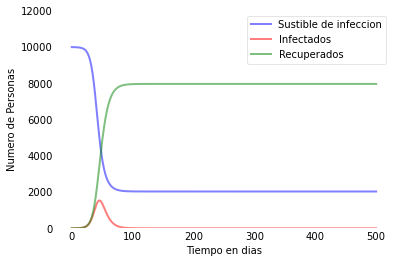

2.0


In [6]:
#Importar las librerias.
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

#N = 166200000
N=10000
# Numero Inicial de Infectados
I0 = 1
# Numero de Recuperados
R0 = 0
# Todos los demás, S0, son susceptibles a la infección inicialmente.
S0 = N - I0 - R0
# Tasa de contacto, beta (nivel de repoductividad del virus) 
# La tasa de recuperación media, gamma,(1/días) Una persona se recupera en 15 dias.
#beta, gamma = 0.00213, 0.00747970 
beta,gamma= 0.4000, 0.20 
# Una cuadrícula de puntos de tiempo (en días)
t = np.linspace(0, 500, 500)

# Las ecuaciones diferenciales del modelo SIR..
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N 
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

# Vector de condiciones iniciales
y0 = S0, I0, R0
# Integre las ecuaciones SIR en la cuadrícula de tiempo, t. A traves de la funcion odeint()
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T # Obtenicion de resultados


#  Trace los datos en tres curvas separadas para S (t), I (t) y R (t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111,  axisbelow=True)
ax.plot(t, S, 'b', alpha=0.5, lw=2, label='Sustible de infeccion')
ax.plot(t, I, 'r', alpha=0.5, lw=2, label='Infectados')
ax.plot(t, R, 'g', alpha=0.5, lw=2, label='Recuperados')
ax.set_xlabel('Tiempo en dias')
ax.set_ylabel('Numero de Personas')
ax.set_ylim(0,N*1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

Ro = beta/gamma
print(Ro)


## Generar la prediccion del modelos SIR

 Se debe  estimar el valor de 
- β 
- γ

Para ajustar el modelo SIR con los casos confirmados reales (el número de personas infecciosas) del Ecuador.
 
 Para ello deben seguir el siguiente tutorial 
 https://www.lewuathe.com/covid-19-dynamics-with-sir-model.html
 


In [97]:
# Implementar y explicar la predicion del modelo SIR para el Ecuador

# 1. Implementar solo teniendo en cuenta los casos confirmados

# 2. Implementar teniendo en cuenta los casos confirmados y recuperados.


## casos confirmados hasta el 8-4-2020


## calcular beta y gama

daos:             date  total_cases
3023  2020-03-01            1
3024  2020-03-02            6
3025  2020-03-03            7
3026  2020-03-05           10
3027  2020-03-06           13
3028  2020-03-09           14
3029  2020-03-10           15
3030  2020-03-11           17
3031  2020-03-14           23
3032  2020-03-15           28
beta 0.34773250653562615
 beta=0.34773251, gamma=0.06595624
r0= 5.272170067593604


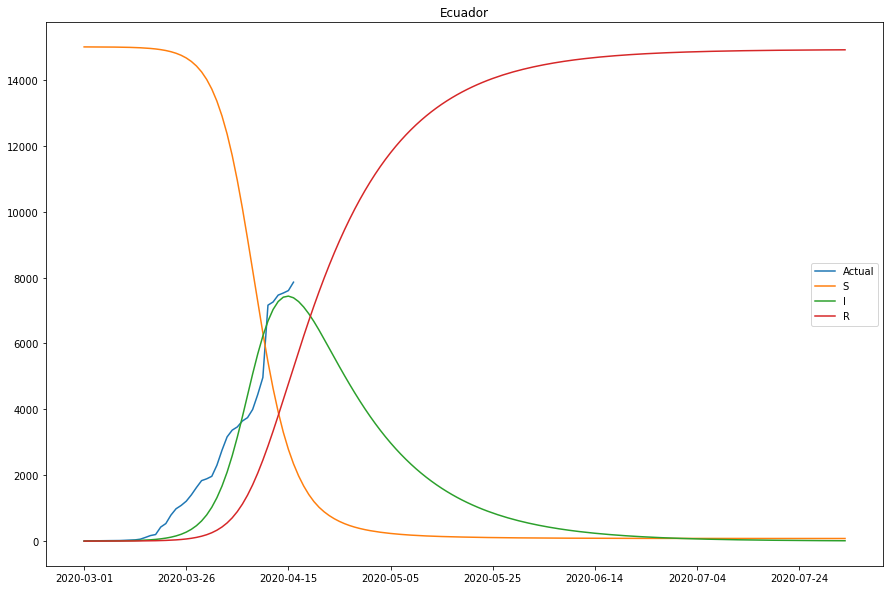

In [2]:

# Importar las librerias para el analasis

import pandas as pd
import numpy as np
from scipy.integrate import solve_ivp
from scipy.optimize import minimize
from datetime import datetime,timedelta
from scipy.integrate import odeint
import matplotlib.pyplot as plt


N = 15000
#N = 166200000
# Numero Inicial de Infectados
I0 = 1
# Numero de Recuperados
R0 = 0
# Todos los demás, S0, son susceptibles a la infección inicialmente.
S0 = N - I0 - R0

def cargar_dataInfectados():
    url = 'https://covid.ourworldindata.org/data/ecdc/full_data.csv'
    df = pd.read_csv(url)
    df = df[df['location'].isin(['Ecuador'])] #Filtro la Informacion solo para Ecuador
    df2 = df[df['total_cases'] >= 1]
    df2 = df2.loc[:,['date', 'total_cases' ]] #Selecciono las columnas de analasis

    return df2


    
def extender_dias(index, new_size):
    valores = index.values
    actual = datetime.strptime(valores[-1], '%Y-%m-%d')
    while len(valores) < new_size:
        actual = actual + timedelta(days=1)
        valores = np.append(valores, datetime.strftime(actual, '%Y-%m-%d'))
    return valores

def predecir(beta, gamma, data, S0, I0, R0):
    
    dataPred = data.total_cases
    rangoPrediccion = 150
    
    new_index = extender_dias(data.date, rangoPrediccion)
    size = len(new_index)
    
    def SIR(t, y):
            S = y[0]
            I = y[1]
            R = y[2]
            return [-beta*S*I/N, beta*S*I/N-gamma*I, gamma*I]
        
    extencion_actual = np.concatenate((dataPred.values, [None] * (size - len(dataPred.values))))
    return new_index, extencion_actual, solve_ivp(SIR, [0, size], [S0,I0,R0], t_eval=np.arange(0, size, 1))


def entrenar():
    data = cargar_dataInfectados()
    #print('daos:',data[:10])
    
    optimo = minimize(
            errorCuadratico,
            [0.001, 0.001],
            args=(data.total_cases, S0, I0, R0),
            method='L-BFGS-B',
            bounds=[(0.00000001, 0.4), (0.00000001, 0.4)]
        )
    
    beta, gamma = optimo.x

    print('beta',beta)
    new_index, extencion_actual, prediccion = predecir(beta, gamma, data, S0, I0, R0)
    df3 = pd.DataFrame({
        'Actual': extencion_actual,
        'S': prediccion.y[0],
        'I': prediccion.y[1],
        'R': prediccion.y[2]
    }, index=new_index)
    fig, ax = plt.subplots(figsize=(15, 10))
    ax.set_title("Ecuador")
    df3.plot(ax=ax)
    print(f" beta={beta:.8f}, gamma={gamma:.8f}")
    print('r0=',beta/gamma)
    
    
    
def errorCuadratico(point, data, S0, I0, R0):

    size = len(data)
    beta, gamma = point

    def SIR(t, y):
        S = y[0]
        I = y[1]
        R = y[2]
        return [-beta*S*I/N, beta*S*I/N-gamma*I, gamma*I]
    
    solution = solve_ivp(SIR, [0, size], [S0,I0,R0], t_eval=np.arange(0, size, 1), vectorized=True)
    return np.sqrt(np.mean((solution.y[1] - data)**2))


# 1. Implementar solo teniendo en cuenta los casos confirmados
entrenar()

#print(beta/gamma,beta)


# 2. Implementar teniendo en cuenta los casos confirmados y recuperados.


## Calculos de incidencia

Para obtener metricas de incidencia se debe calcular la tasa de prevalencia, incidencia y la relacion, para esto leer y obtener estos datos con la ultima lectura.

https://www.paho.org/hq/index.php?option=com_content&view=article&id=14402:indicadores-de-salud-aspectos-conceptuales-y-operativos-seccion-2&catid=9894&limitstart=2&Itemid=101&lang=es

In [110]:
# Implementar
#tasa de incidencia= muestar en un periodo de 2 dias / poblacion total
#N = total poblacions 
N = 166200000
dia100= 4965.0   
dia99=4450.0

incidencia=(((dia100-dia99)/N)*100000)

## prevalencia es igual a el total de casos para el total de la poblacions multiplicado x 100 para sacarl el porcentaje
tasaPrevalencia = (4450/N)*100000

## 15 dias dura el brote del covid
prevalencia =incidencia*15




print('incidencia:',("%.2f" % incidencia), ' personas por cada ',100000,'habitantes')

print('tasa prevalencia:',("%.2f" % tasaPrevalencia), '% de  cada ',100000,'habitantes')

print('prevalencia',prevalencia)

incidencia: 0.31  personas por cada  100000 habitantes
tasa prevalencia: 2.68 % de  cada  100000 habitantes
prevalencia 4.648014440433212


## Analisis

## Conclusiones

## Opinion

# Referencias:
- https://www.agenciasinc.es/Reportajes/Un-modelo-un-teorema-y-teoria-de-juegos-contra-el-coronavirus
- https://rpubs.com/dsfernandez/422937
- https://towardsdatascience.com/modelling-the-coronavirus-epidemic-spreading-in-a-city-with-python-babd14d82fa2